In [35]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
##Uploading the datasets
df_training = pd.read_csv('training_clean')
df_test = pd.read_csv('test_clean')

In [9]:
## Dropping columns missed in the data cleaning process
ls_drop = ['addr_state_IA', 'home_ownership_OTHER', 'purpose_educational']
df_training = df_training.drop('Unnamed: 0', 1)
df_training = df_training.drop(ls_drop, 1)

In [10]:
df_test = df_test.drop('Unnamed: 0', 1)

In [11]:
## Decision Tree code from lab

In [12]:
X = df_training.drop('loan_status_current', 1)
y = df_training['loan_status_current']

In [13]:
## Labeling the training and test data
X_train = df_training[['purpose_house', 'purpose_small_business', 'emp_length', 'annual_inc']]
X_test = df_test[['purpose_house', 'purpose_small_business', 'emp_length', 'annual_inc']]
y_train = df_training['loan_status_current']
y_test = df_test['loan_status_current']

In [14]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [15]:
# Make predictions for test data
y_pred = classifier.predict(X_test) 

In [16]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

Accuracy is :81.58246852446926


In [17]:
# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))


AUC is :0.5


In [18]:
# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0,1,All
True,,,
0,617110,11492,628602
1,128356,2362,130718
All,745466,13854,759320


In [ ]:
#Grid Search found the following optimal parameters: 
#criterion: 'gini'
#max_depth: 6
#min_samples_leaf: 7
#min_samples_split: 5

In [25]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_leaf = 7, min_samples_split = 5)  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

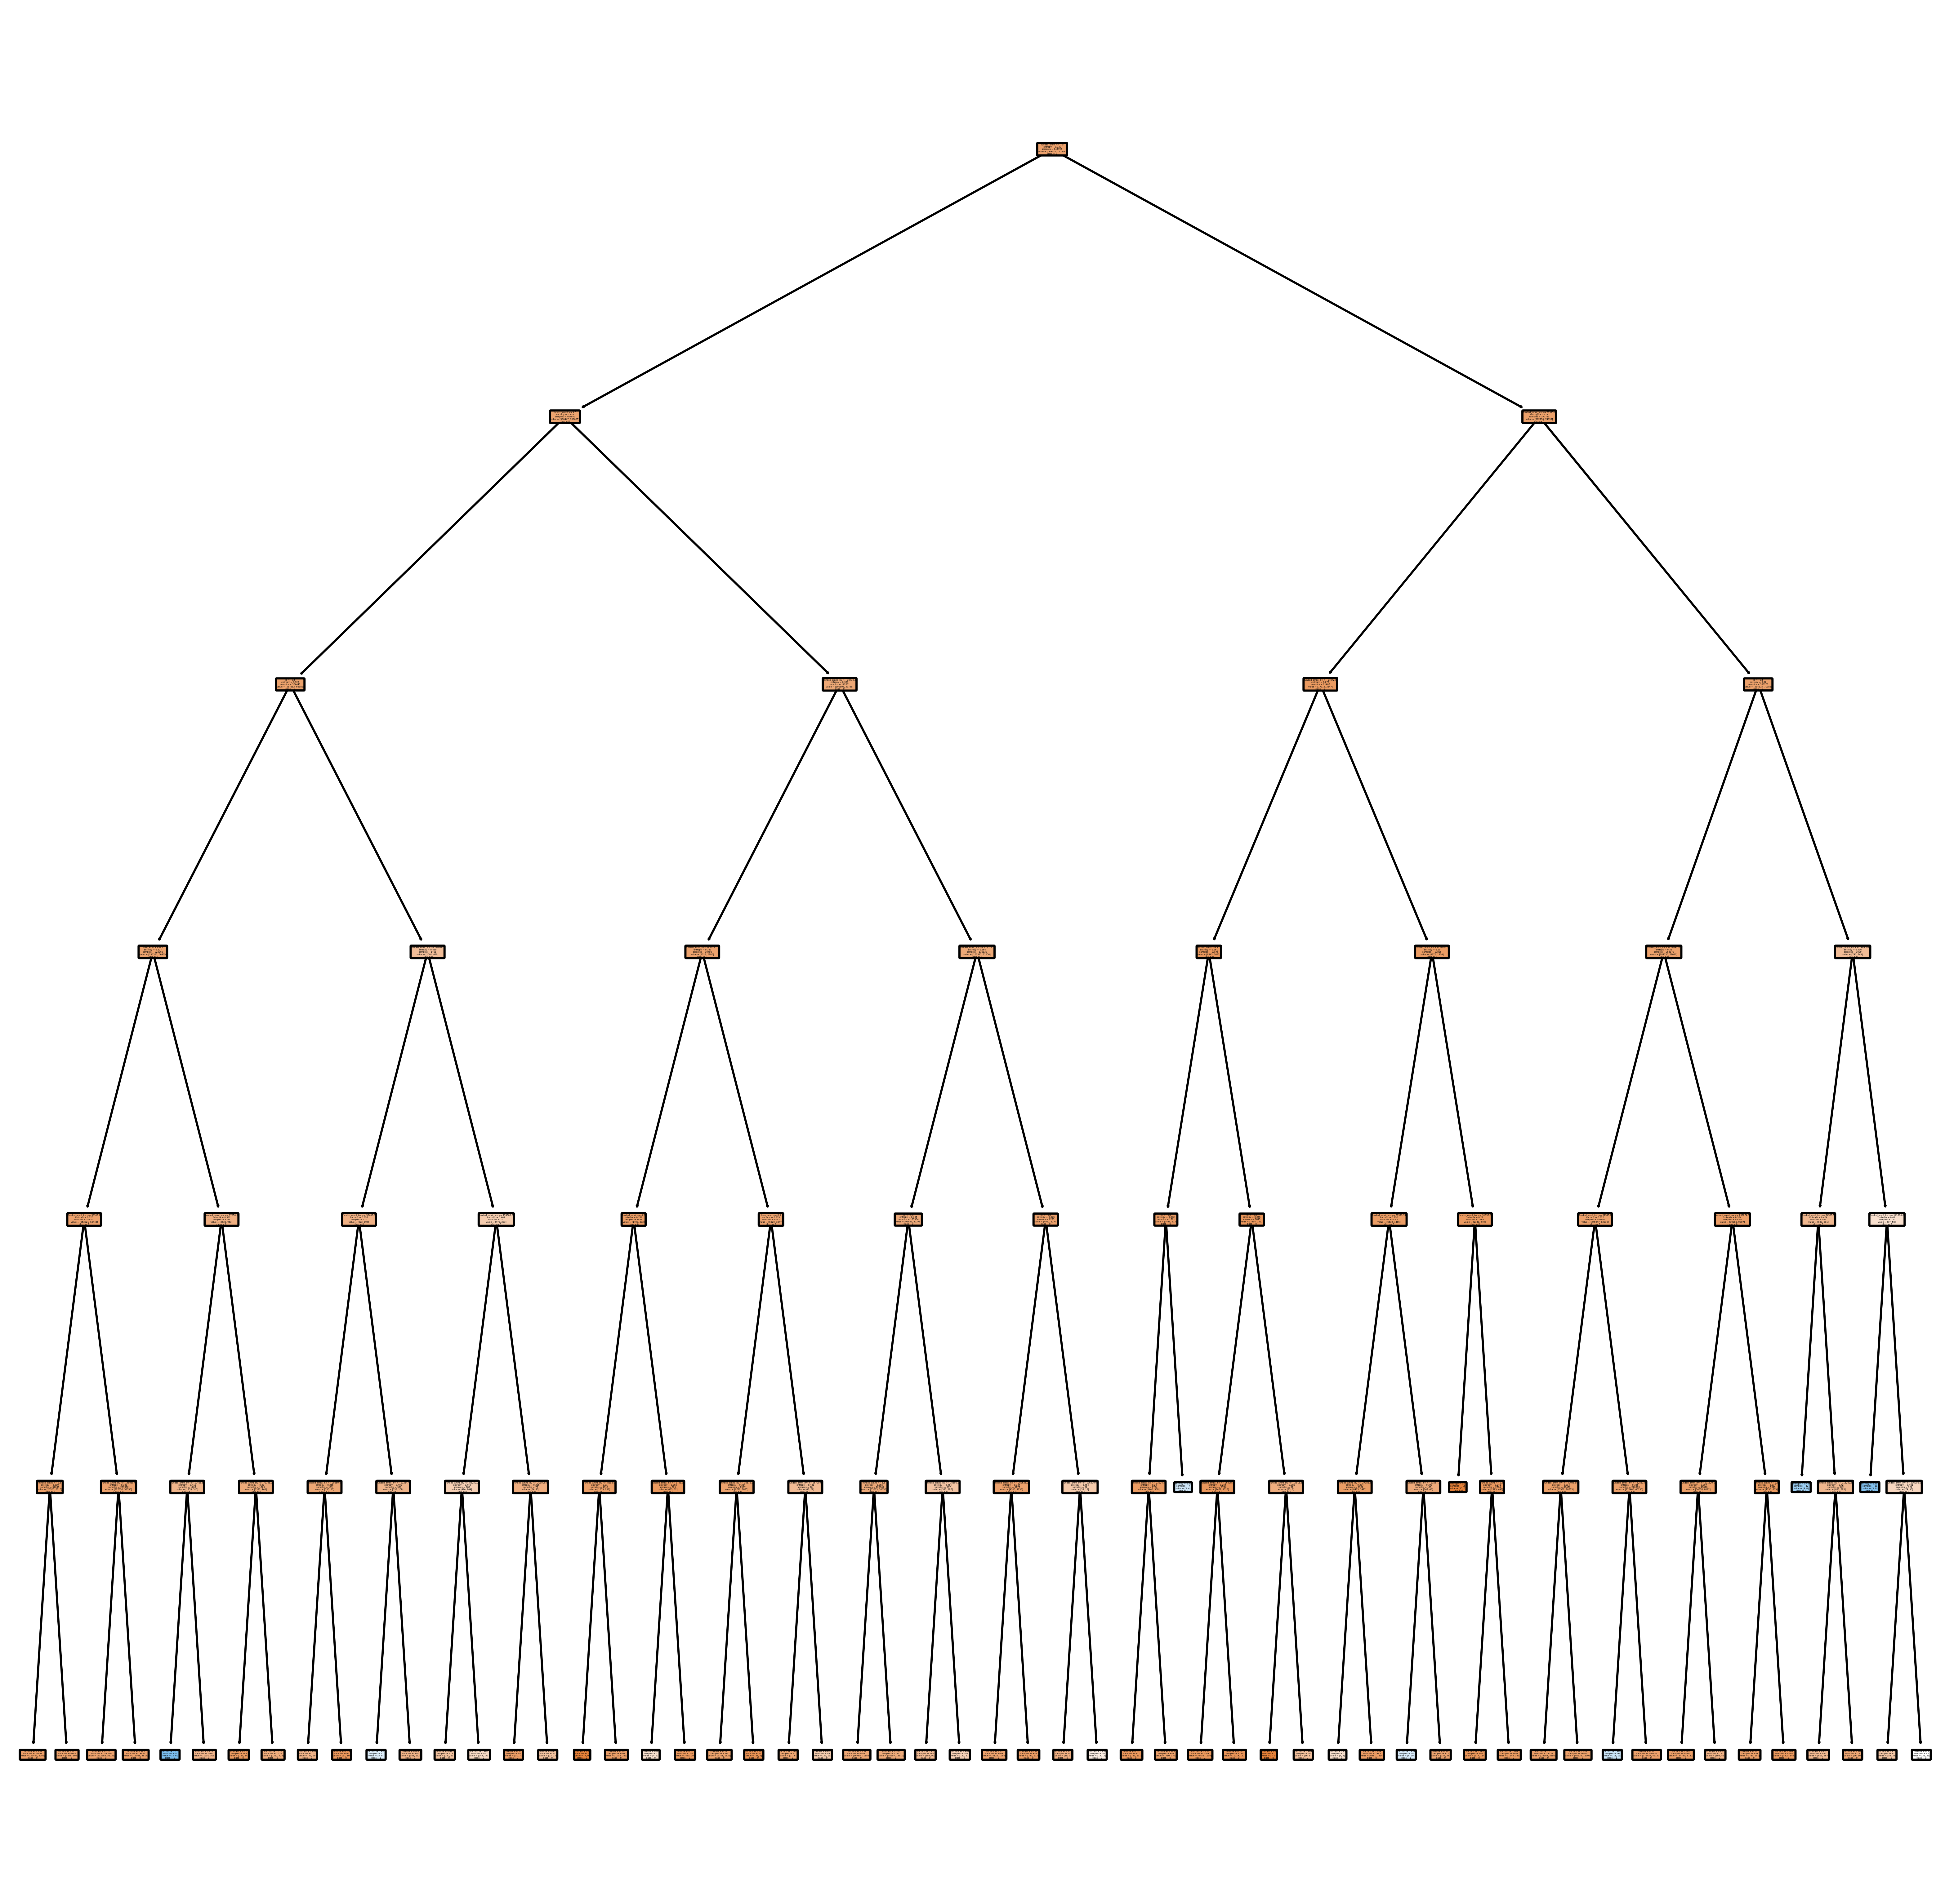

In [27]:
# Plot and show decision tree
plt.figure(figsize=(16,16), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [3]:
## Grid Search

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 5, 7, 8, 10]
}

In [24]:
grid_clf = GridSearchCV(classifier_2, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

/Users/alextyryshkin/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Grid Search found the following optimal parameters: 
criterion: 'gini'
max_depth: 6
min_samples_leaf: 7
min_samples_split: 5

Training Accuracy: 79.22%
Validation accuracy: 82.78%


In [67]:
# Instantiate and fit a DecisionTreeClassifier
classifier_2 = DecisionTreeClassifier(class_weight = {0: 2, 1: 7}, criterion = 'gini', max_depth = 6, min_samples_leaf = 7, min_samples_split = 5)  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 2, 1: 7}, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [68]:
## Classification report after Grid Search
sklearn.metrics.classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.99      0.90    628602\n           1       0.21      0.01      0.02    130718\n\n    accuracy                           0.82    759320\n   macro avg       0.52      0.50      0.46    759320\nweighted avg       0.72      0.82      0.75    759320\n'

In [69]:
# Test set predictions
pred = classifier_2.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[542291  86311]
 [112438  18280]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85    628602
           1       0.17      0.14      0.16    130718

    accuracy                           0.74    759320
   macro avg       0.50      0.50      0.50    759320
weighted avg       0.72      0.74      0.73    759320



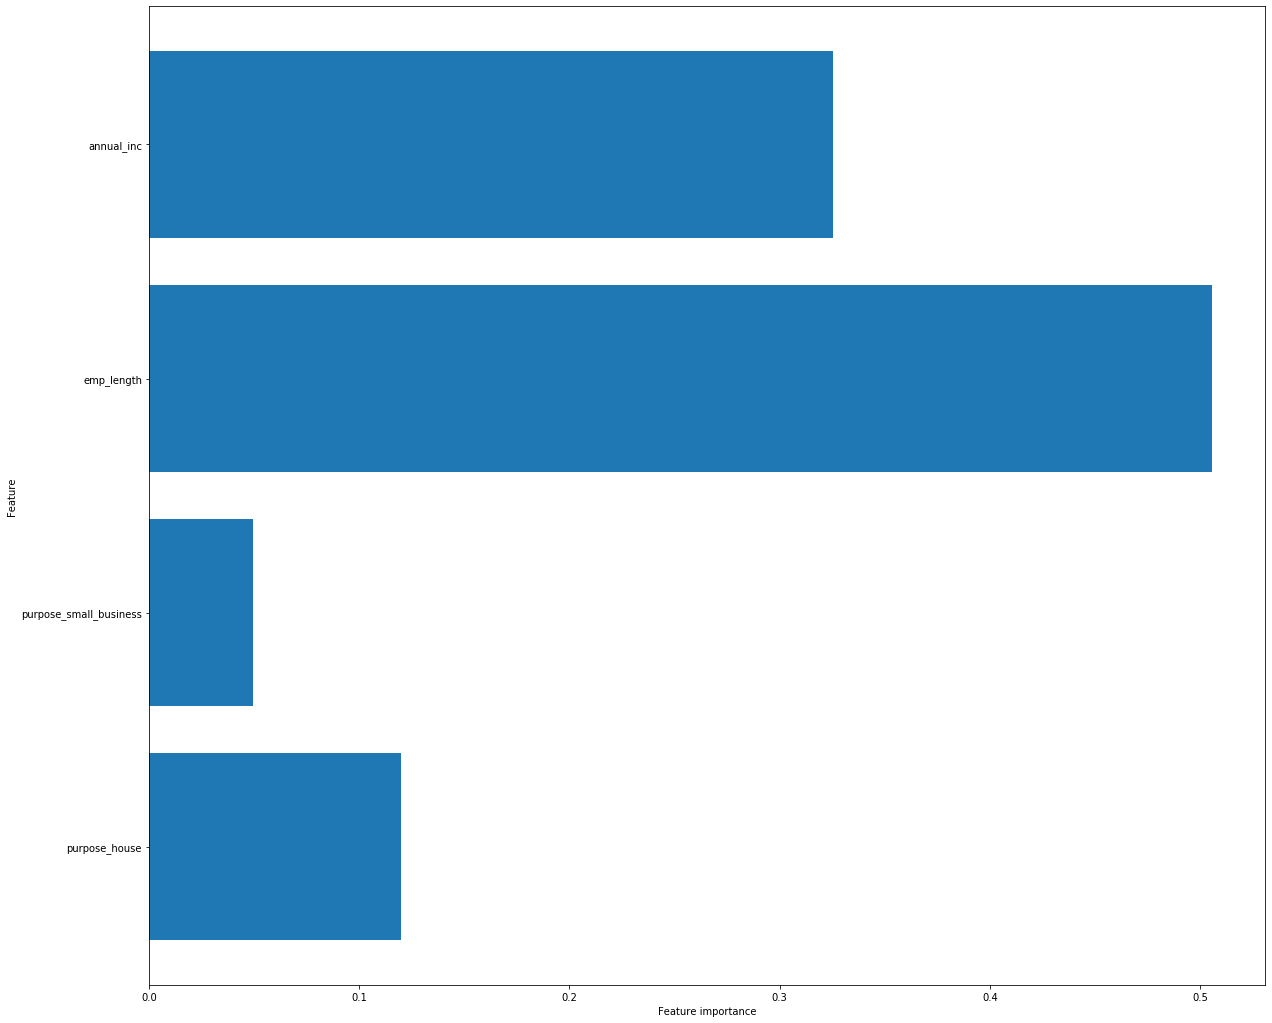

In [70]:
## Plotting feature importances of decision tree classifier
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,18))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(classifier_2)

In [74]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844795 entries, 0 to 844794
Data columns (total 4 columns):
purpose_house             844795 non-null int64
purpose_small_business    844795 non-null int64
emp_length                844795 non-null int64
annual_inc                844795 non-null float64
dtypes: float64(1), int64(3)
memory usage: 25.8 MB
